In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

import utils
import forward_model
import globals
import least_squares
import section_search
import coordinate_descent
import initialization

import torch

/data/holly_jackson/miniconda3/envs/dfd-sparse/lib/python3.12/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


In [2]:
experiment_folder = '/data/holly_jackson/experiments/mobile-depth-windowed5-thresh0.5-balls_2025-10-31_13-30-29'
# experiment_folder = '/data/holly_jackson/experiments/mobile-depth-windowed5-thresh0.5-keyboard_2025-10-28_14-05-17'
# experiment_folder = '/data/holly_jackson/experiments/mobile-depth-windowed3-thresh0.5-keyboard_2025-10-28_14-06-13'
dpt = utils.load_NYUv2_dpt(os.path.join(experiment_folder, 'dpt.tiff'), resize_frac=1)
aif = utils.load_NYUv2_aif(os.path.join(experiment_folder, 'aif.tiff'), resize_frac=1)

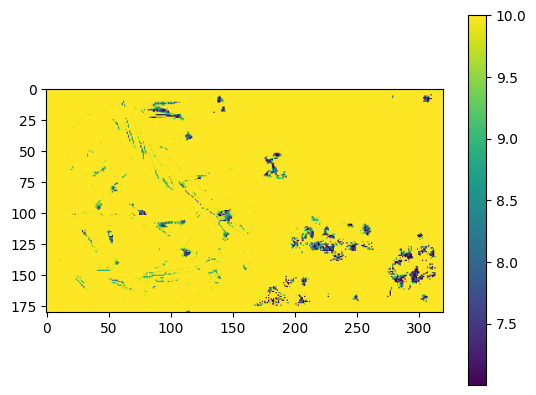

In [3]:
plt.imshow(dpt)
plt.colorbar()
plt.show()

precomputing indices
True
precomputing indices
precomputing indices
precomputing indices


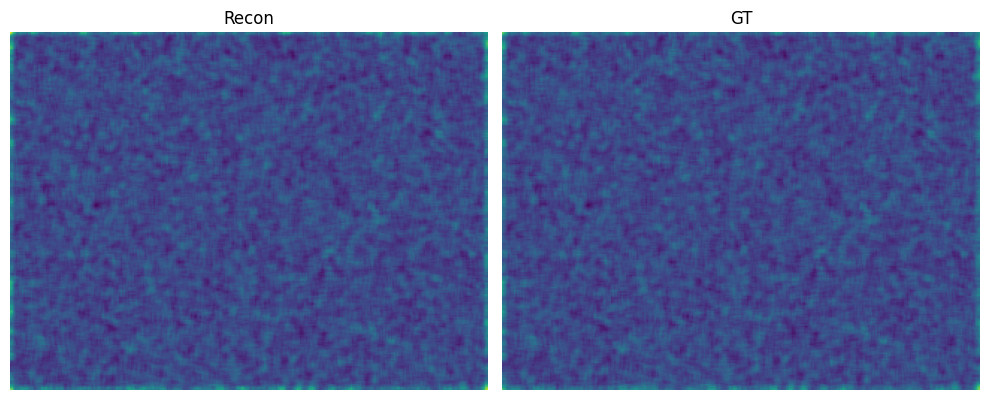

In [7]:
# test that windowed_mse versions all produce same thing for grid search
# check that this is **different** from normal mse 
globals.init_NYUv2()
globals.thresh = 0.5
globals.window_size = 5

width = 240
height = 320

indices = forward_model.precompute_indices(width, height)

# dpt = np.random.rand(width, height) * 3
dpt = np.ones((width,height), dtype=np.float32) * 3
gt_aif = np.random.rand(width, height, 3) * 255
grid_search = True if np.all(np.isclose(dpt, dpt[0][0])) else False
print(grid_search)

defocus_stack = np.random.rand(5, width, height, 3) * 255

mse_nothing = section_search.objective_full(dpt, gt_aif, defocus_stack, windowed=False)
mse_v1 = section_search.objective_full(dpt, gt_aif, defocus_stack, windowed=True)
# mse_v3 = section_search.windowed_mse_gss(dpt, gt_aif, defocus_stack, indices=indices)
# mse_v3_bf = section_search.windowed_mse_v3_brute_force(dpt, gt_aif, defocus_stack, indices=indices)
# assert np.array_equal(mse_v1, mse_v3)
# assert np.array_equal(mse_v3_bf, mse_v3)
# assert np.array_equal(mse_v1, mse_v3_bf)
assert not np.array_equal(mse_nothing, mse_v1)
# assert not np.array_equal(mse_nothing, mse_v3)

mse_convolution = section_search.windowed_mse_grid_v2(defocus_stack, forward_model.forward(dpt, gt_aif))
utils.plot_compare_greyscale(mse_convolution, mse_v1)

assert np.allclose(mse_convolution[10:-10,10:-10], mse_v1[10:-10, 10:-10])

# dpt = np.random.rand(width, height) * 3
# grid_search = True if np.all(np.isclose(dpt, dpt[0][0])) else False
# print(grid_search)

# mse_nothing = section_search.objective_full(dpt, gt_aif, defocus_stack, windowed=False)
# mse_v1 = section_search.windowed_mse_grid(defocus_stack, forward_model.forward(dpt, gt_aif))
# mse_v3_obj = section_search.objective_full(dpt, gt_aif, defocus_stack, windowed=True)
# mse_v3 = section_search.windowed_mse_gss(dpt, gt_aif, defocus_stack, indices=indices)
# assert not np.array_equal(mse_v1, mse_v3)
# assert np.array_equal(mse_v3_obj, mse_v3)
# assert not np.array_equal(mse_nothing, mse_v1)
# assert not np.array_equal(mse_nothing, mse_v3)

# mse_v3_bf = section_search.windowed_mse_v3_brute_force(dpt, gt_aif, defocus_stack, indices=indices)

# utils.plot_compare_greyscale(mse_v3, mse_v3_bf)
# assert np.allclose(mse_v3_bf, mse_v3, rtol=1e-4, atol=1e-5)


In [5]:

print(mse_v3[100:-100] - mse_v3_bf[100:-100])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
